In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 15B0YXLJhx41faA2rVyifWMjlmpuFqAxc

Downloading...
From: https://drive.google.com/uc?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc
To: /content/loan.csv
100% 38.0k/38.0k [00:00<00:00, 72.1MB/s]


In [29]:
data = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\python\Scaler\Hypthesis testing\loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We believe that the loan.csv data shows that graduate unmarried men are in a different income group than both married and unmarried graduate women.

To prove this, would a t-test be more appropriate or a chi-square test?

Carry out the test on the 'ApplicantIncome' column for the two groups and report the p-value. Also report your interpretation.

Note: Assume a confidence level of 95% and round off the p-value to 2 decimal places.

In [9]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
from scipy.stats import ttest_ind

H0= 'The incomes of both groups are similar.'
Ha ='The incomes of both groups are different'

unmarried_graduate_men = data[(data["Gender"] == "Male") & (data["Married"] == "No") & (data["Education"] == "Graduate")]["ApplicantIncome"]
unmarried_graduate_men.dropna(inplace=True)
graduate_women = data[(data["Gender"] == "Female") & (data["Education"] == "Graduate")]["ApplicantIncome"]
graduate_women.dropna(inplace=True)
p_value = ttest_ind(unmarried_graduate_men, graduate_women)[1]
print("p_value :" ,round(p_value,2))

if p_value > 0.05:
    print('Since p_value > 0.05 we fail to reject the null hypothesis.')

else:
    print('Since p_value < 0.05 we reject the null hypothesis.')


p_value : 0.08
Since p_value > 0.05 we fail to reject the null hypothesis.


In [30]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We wish to create a new feature called 'NewFeature' using a linear combination of the features ApplicantIncome, LoanAmount and Credit_History, with weights 1, 3 and 7000,

i.e., data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"]).

Since 'NewFeature' is a numerical feature, convert it to a categorical feature by checking whether 'NewFeature' is greater than 0.25 times the mean of 'NewFeature'. Call this feature 'Separator'.

Perform a chi-square test on the contingency table formed by the features 'Loan_Status' and 'Separator' and report the p-value. Also report your interpretation.

Note: Drop all the rows having 'na' values before performing any operation on the data and assume the significance level to be 5%. Also, round off the p-value to four decimal places.

In [43]:
data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"])

In [44]:
data['NewFeature'].isna().value_counts()



False    543
True      71
Name: NewFeature, dtype: int64

In [47]:
data['NewFeature'] = data['NewFeature'].dropna()


In [48]:
data['NewFeature'].isna().value_counts()


False    543
True      71
Name: NewFeature, dtype: int64

In [50]:
mean_new_feature=data['NewFeature'].mean()
mean_new_feature

11811.832412523021

In [52]:
def new_feature_separator(x):
    if x>0.25*mean_new_feature: 
        return ">mean"
    else: 
        return "less"
data['Seperator']=data['NewFeature'].apply(new_feature_separator)
data['Seperator'].nunique()

2

In [59]:
df_chi=data.loc[:,['Seperator','Loan_Status']]

In [ ]:
from scipy.stats import chi2_contingency

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

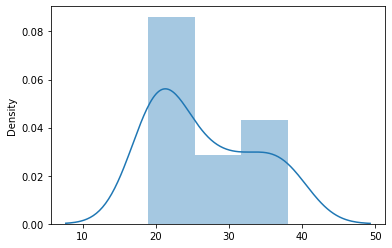

In [22]:
data=[38,36,31,30,20,28,25,26,19,21,19,21,20,21,21,20,21,24,32,35,38,38]
sns.distplot(data)

In [26]:
data=np.array([38,36,31,30,20,28,25,26,19,21,19,21,20,21,21,20,21,24,32,35,38,38])

mean = data.mean()
median = np.median(data)

#there is no direct method to determine the mode.
vals,counts = np.unique(data, return_counts=True)

index = np.argmax(counts)

mode = vals[index]

print("mean:",mean,",median:",median,",mode:",mode)
# Output:

# mean: 26.54 ,median: 24.5 ,mode: 21

# we can clearly observe that mean > median > mode, which is a case of right-skewed distribution

mean: 26.545454545454547 ,median: 24.5 ,mode: 21


In [19]:
data[(data["Gender"] == "Female") & (data["Education"] == "Graduate")]['Married']

17      No
29      No
37     Yes
45      No
48     Yes
      ... 
582    Yes
600     No
604    Yes
609     No
613     No
Name: Married, Length: 92, dtype: object

In [ ]:
data = pd.read_csv('/content/loan.csv')
data.shape

(614, 13)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data = data.drop("Loan_ID",axis = 1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.describe(include = ['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [ ]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.isna().sum()*100/len(data)

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
cat_cols = data.dtypes == "object"
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
cat_cols.remove('Loan_Status')
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
#Univariate analysis

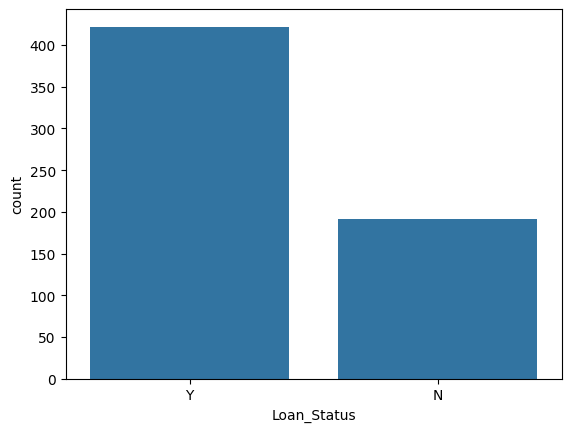

In [ ]:
sns.countplot(data = data, x = "Loan_Status")
plt.show()

In [ ]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

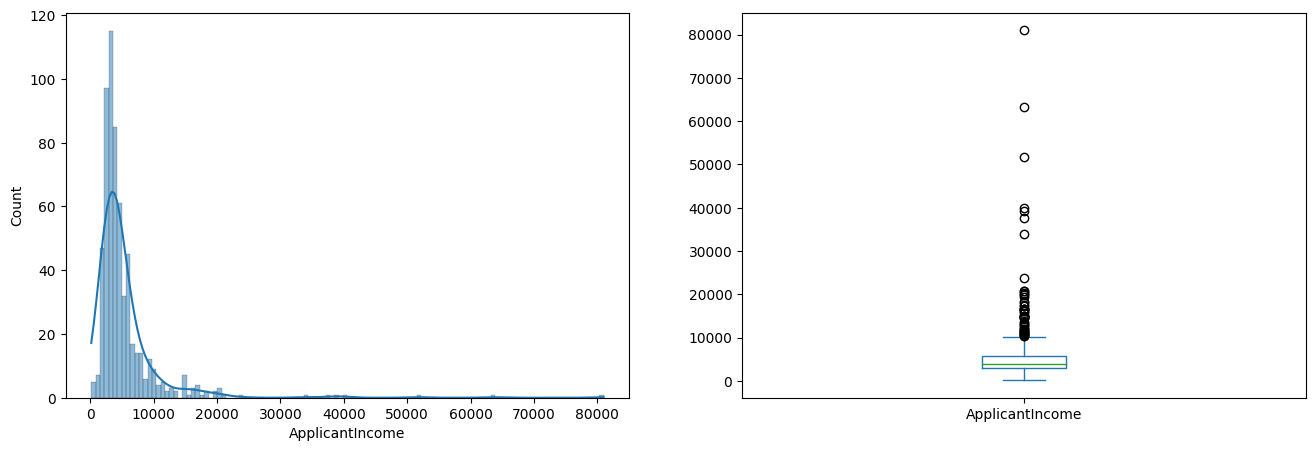

In [ ]:
plt.subplot(1,2,1)
sns.histplot(data["ApplicantIncome"], kde = True)
plt.subplot(1,2,2)
data["ApplicantIncome"].plot.box(figsize = (16,5))
plt.show()

In [ ]:
#Checking Loan Status wrt Avg Applicant income

data.groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [ ]:
income_y = data[data["Loan_Status"] == "Y"]["ApplicantIncome"]
income_n = data[data["Loan_Status"] == "N"]["ApplicantIncome"]

In [ ]:
#cat vs Num --> ind t-test , alpha = 0.05


#H0:Income and Loan Status are independent
#Ha: Income and Loan Status are dependent

from scipy.stats import ttest_ind
ttest_ind(income_n, income_y)

#Failed to reject H0 --> Independent

TtestResult(statistic=0.11650844828724542, pvalue=0.907287812130518, df=612.0)

In [ ]:
#skewness  & Kurtosis

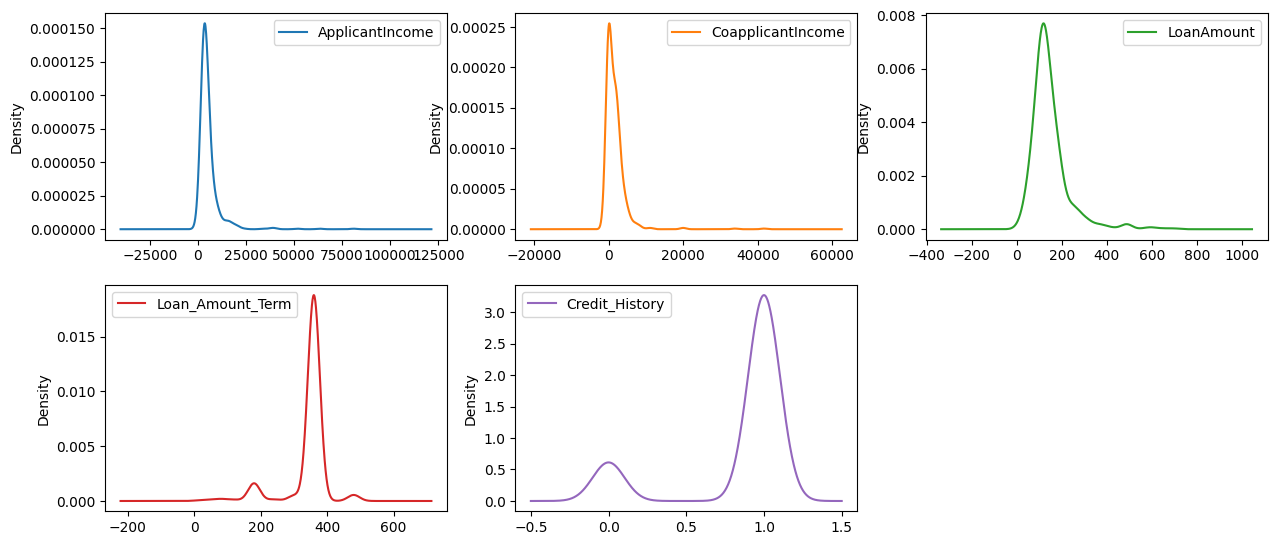

In [ ]:
plt.rcParams["figure.figsize"] = [15,10]
data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

In [ ]:
data.skew()

<ipython-input-28-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [ ]:
#Step2 - Binning --> Numeric data into categorical data

In [ ]:
bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low','Average','medium', 'h1', 'h2', 'h3', 'h4' , 'Very high']

In [ ]:
data["Income_bins"] = pd.cut(data["ApplicantIncome"], bins, labels =group)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium


In [ ]:
pd.crosstab(data["Income_bins"],data["Loan_Status"])

Loan_Status,N,Y
Income_bins,,
Low,34,74
Average,67,159
medium,45,98
h1,20,34
h2,9,22
h3,13,27
h4,3,6
Very high,1,2


In [ ]:
val = pd.crosstab(index = data["Income_bins"], columns = data["Loan_Status"]).values
print(val)

[[ 34  74]
 [ 67 159]
 [ 45  98]
 [ 20  34]
 [  9  22]
 [ 13  27]
 [  3   6]
 [  1   2]]


In [ ]:
#cat vs cat --> chisquared

In [ ]:
from scipy.stats import chi2_contingency

#H0: Loan status and income are independent - un-correlated
#Ha: Dependent.

chi2_contingency(val)
#Fail to reject H0

Chi2ContingencyResult(statistic=1.2420001711303135, pvalue=0.9899274842922701, dof=7, expected_freq=array([[ 33.77198697,  74.22801303],
       [ 70.67100977, 155.32899023],
       [ 44.71661238,  98.28338762],
       [ 16.88599349,  37.11400651],
       [  9.69381107,  21.30618893],
       [ 12.50814332,  27.49185668],
       [  2.81433225,   6.18566775],
       [  0.93811075,   2.06188925]]))

In [ ]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,6000.0


In [ ]:
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,TotalIncome,TotalIncome_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium,5849.0,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,6091.0,High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0,Low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,6000.0,High


In [ ]:
vals = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"])
vals

Loan_Status,N,Y
TotalIncome_bin,,
Low,20,27
Average,69,154
High,61,151
Very High,42,90


In [ ]:
chi2_contingency(vals)

Chi2ContingencyResult(statistic=3.428480885250809, pvalue=0.3301570564076713, dof=3, expected_freq=array([[ 14.6970684 ,  32.3029316 ],
       [ 69.73289902, 153.26710098],
       [ 66.29315961, 145.70684039],
       [ 41.27687296,  90.72312704]]))

In [ ]:
#Loan_Term

In [ ]:
data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
#loan term in years
data["Loan_Amount_Term"] = (data["Loan_Amount_Term"]/12).astype("float")

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,TotalIncome,TotalIncome_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High


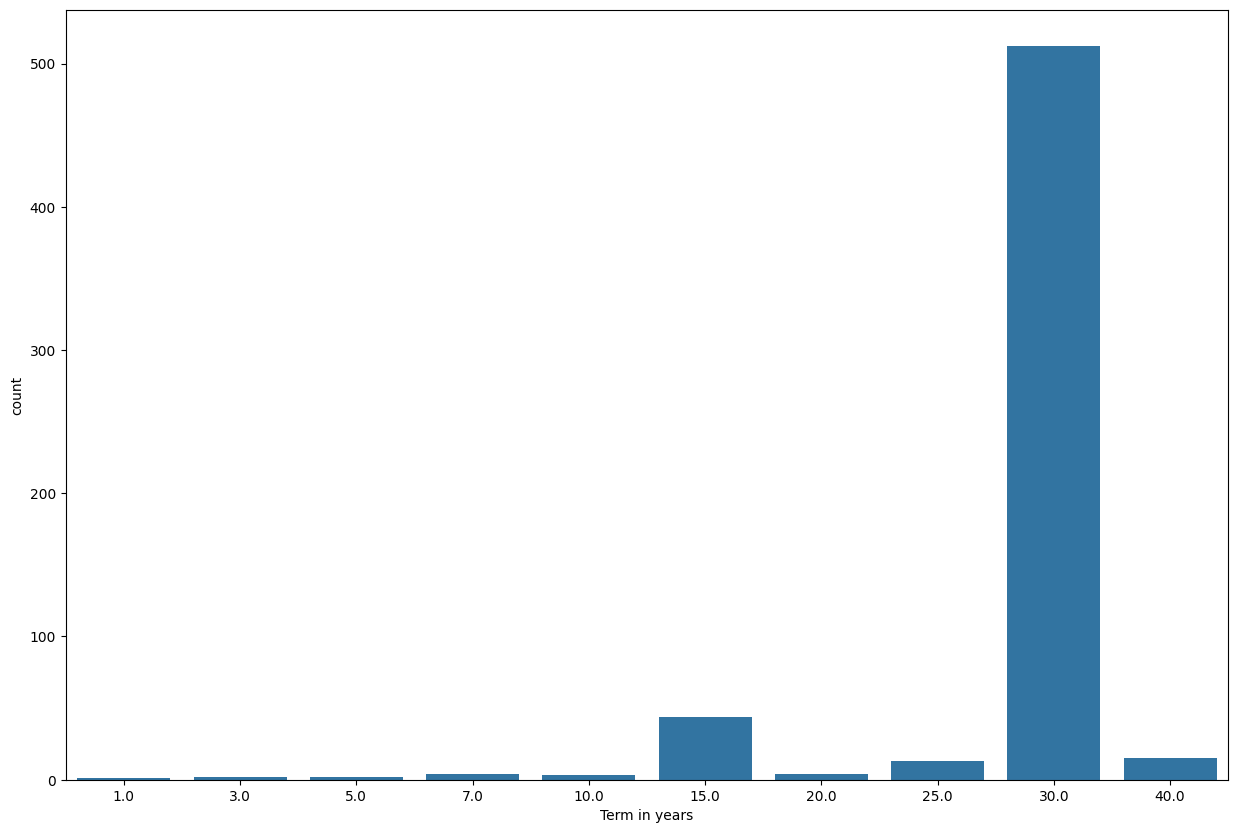

In [ ]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()

In [ ]:
#Able to pay loan

data["Loan_Amount_per_year"] = data["LoanAmount"]/data["Loan_Amount_Term"]

In [ ]:
data["EMI"] = data["Loan_Amount_per_year"]*1000/12 #Loan amount --> 1000 USD

In [ ]:
data["Able_to_pay_EMI"] = (data["TotalIncome"]*0.3 > data["EMI"]).astype("int")

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High,4.700000,391.666667,1


In [ ]:
chi2_contingency(pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status']))
#Loan Status is dependent on Able to Pay EMI --> Reject H0

Chi2ContingencyResult(statistic=4.467271867611989, pvalue=0.03455011506195388, dof=1, expected_freq=array([[ 12.50814332,  27.49185668],
       [179.49185668, 394.50814332]]))